In [20]:
import pandas as pd
import numpy as np

from mothernet.evaluation.cd_plot_new.cd_plot_code import cd_evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", FutureWarning)

varies_over_time= ['XGBoost', 'RF', 'MLP', 'KNN', 'LogReg']

#validation_result_file = 'results/results_validation_for_paper_2024-05-16.csv'
#validation_result_file = 'results/results_validation_2024-05-20.csv'
validation_result_file = 'results/results_validation_2024-05-20.csv'
test_result_file = 'results/results_test_for_mothernet_paper_2024-05-21.csv'

#test_result_file = None

valid_results = pd.read_csv(validation_result_file, index_col=0)
rename_dict = {#'additive_Dclass_average_factorizedoutputTrue_w001_03_02_2024_02_21_10_epoch_420': 'additive class average factorized',
                                                      'additive_Dclass_average_02_29_2024_04_15_55_epoch_1050': 'additive_class_average',
                                                      'additive_1_gpu_02_14_2024_16_34_15': 'additive dense',
                                                   'mn_Dclass_average_03_25_2024_17_14_32_epoch_3970_ohe_ensemble_8': 'MotherNet',
                                                    'MotherNet': 'mothernet_old',
                                                     'additive_Dclass_average_multiclassmaxsteps3_multiclasstypesteps_03_04_2024_19_04_03_epoch_270': 'steps_prior',
                                                     #'baam_nfeatures_20_no_ensemble_e1520': 'GammaNet',
    'mothernet_ohe_ensemble_8_quantile_gpu_timing': 'MotherNet',
    'mn_categoricalfeaturep09_numfeaturessamplerdouble_sample_05_09_2024_23_39_30_epoch_1270_ohe_quantile_8': 'MotherNet',

    'batapfn_no_ensemble_e410': 'bi-attention TabPFN',
    'XGBoost': 'XGBoost$^\dag$',
    'KNN': 'KNN$^\dag$',
    'mlp_gpu2': 'MLP$^\ddag$',
    'resnet_gpu': 'ResNet$^\ddag$',
    'mn_categoricalfeaturep09_numfeaturessamplerdouble_sample_05_09_2024_23_39_30_epoch_1270_ohe_quantile_8_cpu_timing3': 'MotherNet (CPU)',
    #'ebm_default': 'EBM (interactions)',
    #'ebm_bins_main_effects': 'EBM (main effects)',
    'hyperfast_no_optimize_gpu': 'HyperFast (no GD)',
    'hyperfast_defaults_gpu' : 'HyperFast (default)',
    'hyperfast_tuning_gpu': 'HyperFast$^\ddag$',
    'LogReg': 'Logistic Regression$^\dag$',
     'RF': 'RandomForest$^\dag$',
    'mothernet_init_gd_no_learning_preprocess2': 'MotherNet (no baggging)',
    'mothernet_gd_gpu4': 'MotherNet plus Gradient Descent$^\ddag$',
    'TabPFN (Hollmann)': 'TabPFN',
    "MotherNet": "MotherNet_old",
    
   # 'MLP-Distill': 'mlp_distill',
    #'MLP': 'MLP (60 min HPO)',
    'MLP': 'MLP_drop',
    'TabPFN (ours)': 'tabpfn_ours_hide'}
#valid_results.model.unique()
#valid_results['model'] = valid_results.model.replace({'hyperfast_defaults_cpu': 'hyperfast_defaults_gpu'}) ## HACCCKKK
valid_results['model'] = valid_results.model.replace(rename_dict)

valid_results = valid_results[valid_results.model != "hyperfast_no_optimize_cpu"]
valid_results = valid_results[~valid_results.model.str.contains('_')]
all_models = valid_results.model.unique()



In [21]:
all_models

array(['KNN$^\\dag$', 'RandomForest$^\\dag$', 'XGBoost$^\\dag$',
       'Logistic Regression$^\\dag$', 'MLP-Distill', 'TabPFN',
       'HyperFast (no GD)', 'HyperFast (default)', 'MotherNet'],
      dtype=object)

In [22]:
if test_result_file:
    test_results = pd.read_csv(test_result_file, index_col=0)
    test_results['model'] = test_results.model.replace(rename_dict)
    test_results = test_results[~test_results.model.str.contains('_')]
    all_models = set(valid_results.model.unique()).union(set(test_results.model.unique()))

    print(test_results.model.unique())
    print(valid_results.model.unique())
    assert set(test_results.model.unique()) == set(valid_results.model.unique())

['KNN$^\\dag$' 'RandomForest$^\\dag$' 'XGBoost$^\\dag$'
 'Logistic Regression$^\\dag$' 'MLP-Distill' 'TabPFN'
 'MotherNet (no baggging)' 'HyperFast (no GD)' 'HyperFast (default)'
 'MotherNet' 'MotherNet (CPU)' 'HyperFast$^\\ddag$' 'MLP$^\\ddag$'
 'ResNet$^\\ddag$' 'MotherNet plus Gradient Descent$^\\ddag$']
['KNN$^\\dag$' 'RandomForest$^\\dag$' 'XGBoost$^\\dag$'
 'Logistic Regression$^\\dag$' 'MLP-Distill' 'TabPFN' 'HyperFast (no GD)'
 'HyperFast (default)' 'MotherNet']


AssertionError: 

In [23]:
test_results.dataset.unique()

array(['balance-scale', 'mfeat-fourier', 'breast-w', 'mfeat-karhunen',
       'mfeat-morphological', 'mfeat-zernike', 'cmc', 'credit-approval',
       'credit-g', 'diabetes', 'tic-tac-toe', 'vehicle', 'eucalyptus',
       'analcatdata_authorship', 'analcatdata_dmft', 'pc4', 'pc3', 'kc2',
       'pc1', 'banknote-authentication',
       'blood-transfusion-service-center', 'ilpd', 'qsar-biodeg', 'wdbc',
       'cylinder-bands', 'dresses-sales', 'MiceProtein', 'car',
       'steel-plates-fault', 'climate-model-simulation-crashes'],
      dtype=object)

In [24]:
test_results[test_results.dataset=="breast-w"].groupby("model").inference_time.mean()

model
HyperFast (default)                        0.031655
HyperFast (no GD)                          0.030977
HyperFast$^\ddag$                          0.006531
KNN$^\dag$                                 0.004865
Logistic Regression$^\dag$                 0.000239
MLP$^\ddag$                                0.000263
MLP-Distill                                0.000950
MotherNet                                  0.003509
MotherNet (CPU)                            0.084855
MotherNet (no baggging)                    0.000532
MotherNet plus Gradient Descent$^\ddag$    0.000960
RandomForest$^\dag$                        0.041584
ResNet$^\ddag$                             0.000669
TabPFN                                     0.112942
XGBoost$^\dag$                             0.019420
Name: inference_time, dtype: float64

In [25]:
color_palette = sns.color_palette(n_colors=len(all_models))
color_mapping = dict(zip(all_models, color_palette))

In [26]:
def get_best_over_time(results):
    max_time_per_dataset_model = results.groupby(["dataset", "model"])["max_time"].max().rename('max_time_overall')
    average_over_splits = results.groupby(["dataset", "model", "max_time"])[["mean_metric", "fit_time", "inference_time"]].mean()
    joined_with_max_time = average_over_splits.join(max_time_per_dataset_model).reset_index()
    return joined_with_max_time[joined_with_max_time.max_time == joined_with_max_time.max_time_overall]

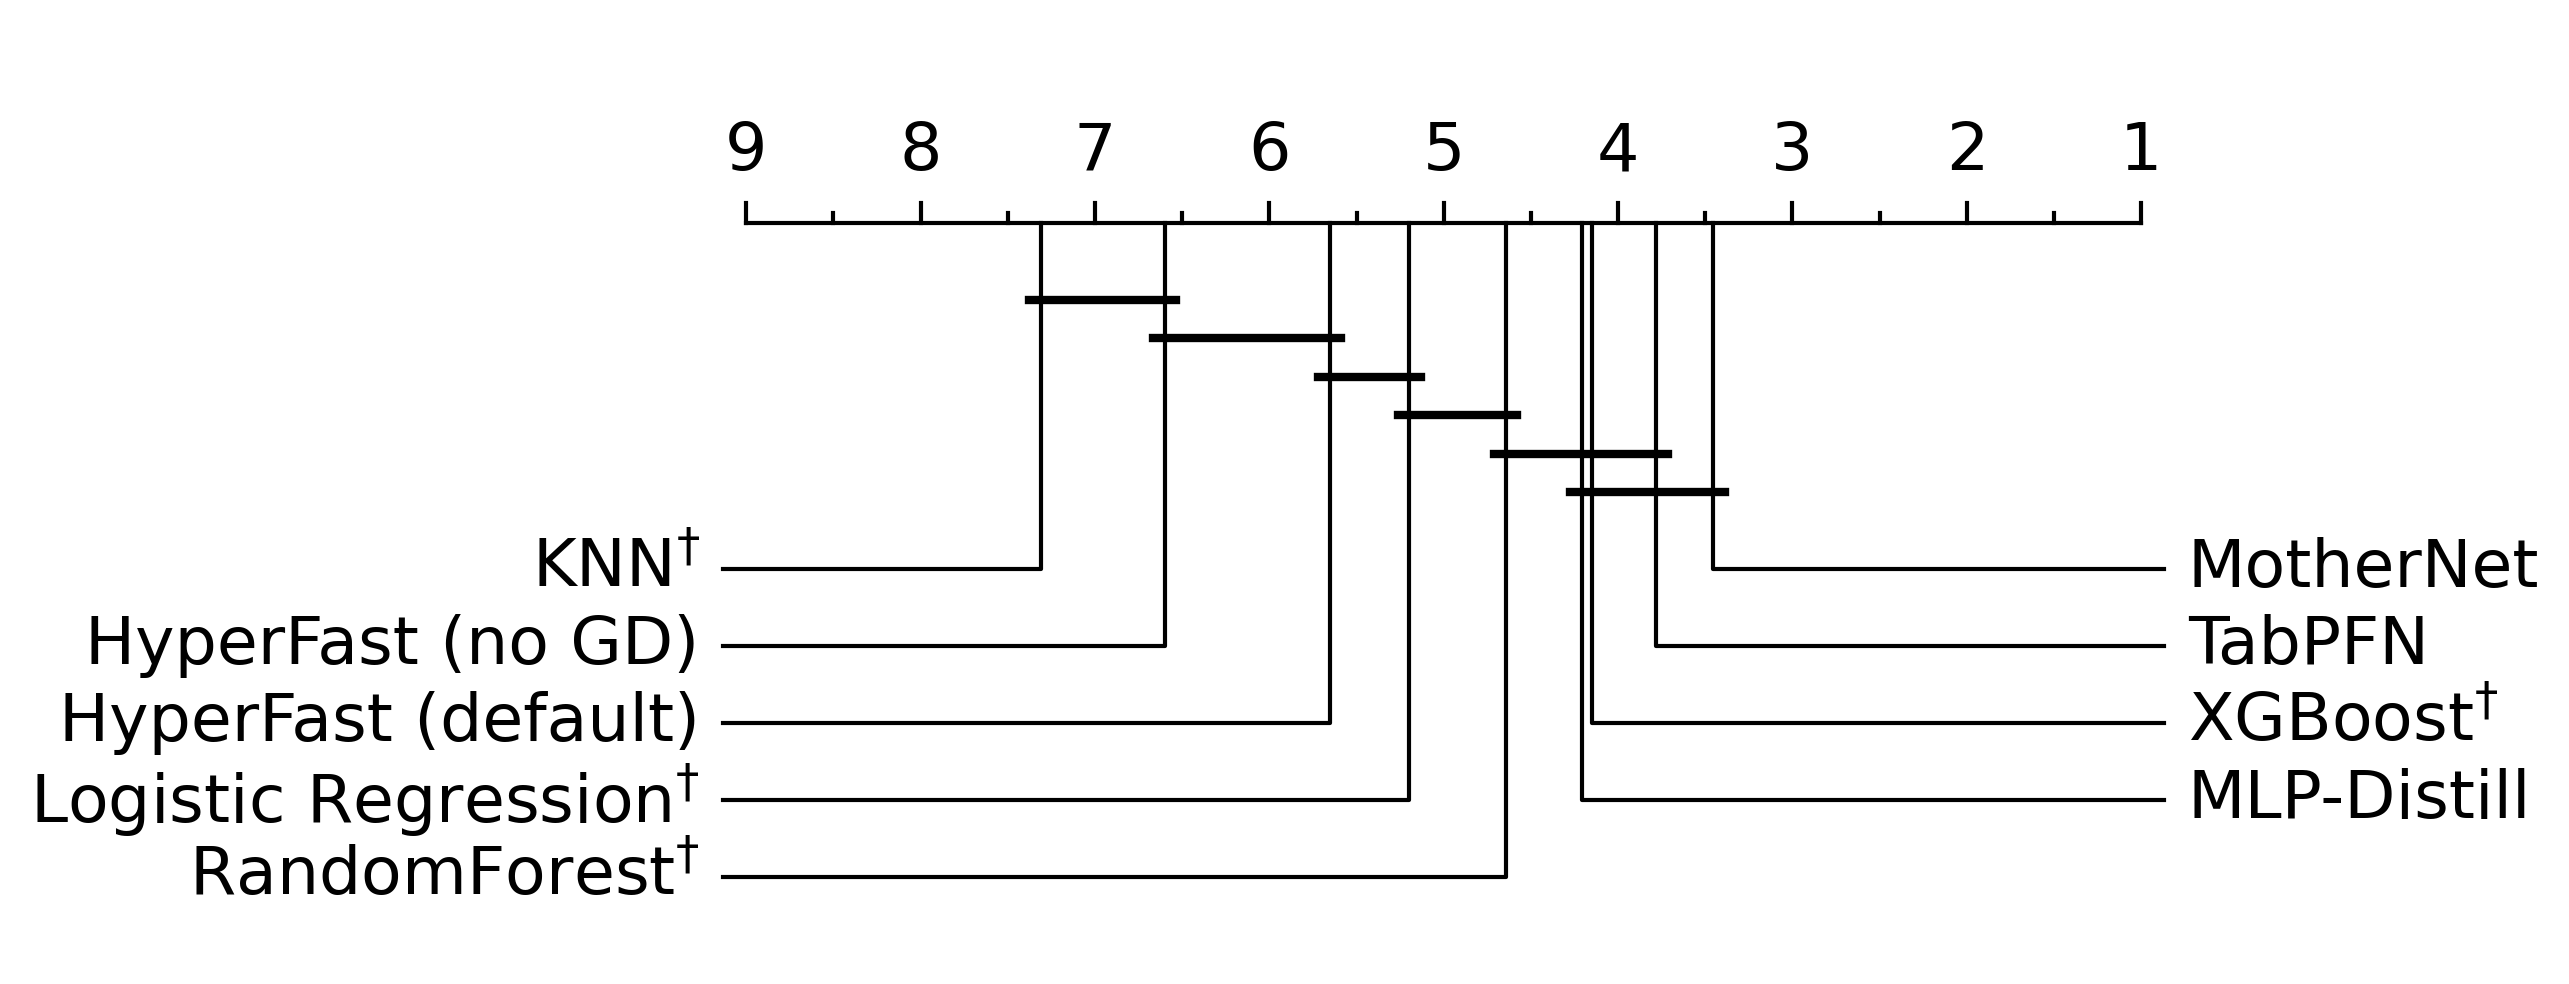

In [27]:
plt.figure(figsize=(8, 4), dpi=300)
combined_best_valid = get_best_over_time(valid_results)
pivoted_for_cd = combined_best_valid.pivot(index="dataset", columns="model", values="mean_metric")
_ = cd_evaluation(pivoted_for_cd, maximize_metric=True, ax=plt.gca())
plt.savefig("../figures/cd_diagram_validation.pdf", bbox_inches="tight")

In [28]:
test_results

,dataset,model,mean_metric,split,max_time,best,fit_time,inference_time,num_trials
0,balance-scale,KNN$^\dag$,0.898451,1,1,{'n_neighbors': 14},0.000790,0.031152,NaN
1,balance-scale,KNN$^\dag$,0.848925,2,1,{'n_neighbors': 8},0.000795,0.026842,NaN
2,balance-scale,KNN$^\dag$,0.852651,3,1,{'n_neighbors': 10},0.000851,0.027301,NaN
3,balance-scale,KNN$^\dag$,0.885874,4,1,{'n_neighbors': 10},0.000786,0.028868,NaN
4,balance-scale,KNN$^\dag$,0.895205,5,1,{'n_neighbors': 15},0.000829,0.027410,NaN
...,...,...,...,...,...,...,...,...,...
7795,climate-model-simulation-crashes,MotherNet plus Gradient Descent$^\ddag$,0.926609,1,3600,"{'dropout_rate': 0.3, 'learning_rate': 0.00057...",0.051890,0.000955,903.0
7796,climate-model-simulation-crashes,MotherNet plus Gradient Descent$^\ddag$,0.937867,2,3600,"{'dropout_rate': 0.1, 'learning_rate': 1.01205...",0.256001,0.000964,902.0
7797,climate-model-simulation-crashes,MotherNet plus Gradient Descent$^\ddag$,0.935806,3,3600,"{'dropout_rate': 0.1, 'learning_rate': 7.49013...",0.267680,0.001275,937.0
7798,climate-model-simulation-crashes,MotherNet plus Gradient Descent$^\ddag$,0.937669,4,3600,"{'dropout_rate': 0.1, 'learning_rate': 2.63955...",0.247117,0.000973,934.0


In [29]:
if test_result_file:
    plt.figure(figsize=(8, 4), dpi=300)
    combined_best_test = get_best_over_time(hide_for_plots(test_results))
    
    pivoted_for_cd_test = combined_best_test.pivot(index="dataset", columns="model", values="mean_metric")
    _ = cd_evaluation(pivoted_for_cd_test, maximize_metric=True, ax=plt.gca())
    plt.savefig("../figures/cd_diagram_test.pdf", bbox_inches="tight")

NameError: name 'hide_for_plots' is not defined

<Figure size 2400x1200 with 0 Axes>

In [30]:
# combined_best_test_norms = combined_best_test.merge(combined_best_test.groupby("dataset").mean_metric.max().rename("max_auc"), left_on="dataset", right_index=True)
# combined_best_test_norms = combined_best_test_norms.merge(combined_best_test.groupby("dataset").mean_metric.min().rename("min_auc"), left_on="dataset", right_index=True)
# combined_best_test_norms['Normalized ROC AUC'] = (combined_best_test_norms.mean_metric - combined_best_test_norms.min_auc) / (combined_best_test_norms.max_auc - combined_best_test_norms.min_auc)


In [31]:
def compare_splits(results):
    compare_splits_over_time = results.groupby(["model", "split", "max_time"])[['mean_metric', 'fit_time', 'inference_time']].mean().reset_index()
    compare_splits_varies = compare_splits_over_time[compare_splits_over_time.model.isin(varies_over_time)]
    compare_splits_fixed = compare_splits_over_time[~compare_splits_over_time.model.isin(varies_over_time)]
    compare_splits_varies_last = compare_splits_varies[compare_splits_varies.max_time == compare_splits_varies.max_time.max()]
    return compare_splits_over_time, pd.concat([compare_splits_fixed, compare_splits_varies_last])

In [32]:
compare_splits_over_time_valid, compare_splits_valid = compare_splits(valid_results)
if test_result_file:
    compare_splits_over_time_test, compare_splits_test = compare_splits(test_results)

In [33]:
compare_splits_test.model.unique()

array(['HyperFast (default)', 'HyperFast (no GD)', 'HyperFast$^\\ddag$',
       'KNN$^\\dag$', 'Logistic Regression$^\\dag$', 'MLP$^\\ddag$',
       'MLP-Distill', 'MotherNet', 'MotherNet (CPU)',
       'MotherNet (no baggging)',
       'MotherNet plus Gradient Descent$^\\ddag$', 'RandomForest$^\\dag$',
       'ResNet$^\\ddag$', 'TabPFN', 'XGBoost$^\\dag$'], dtype=object)

In [34]:
compare_splits_test

,model,split,max_time,mean_metric,fit_time,inference_time
0,HyperFast (default),1,1,0.871031,25.921448,0.045736
1,HyperFast (default),2,1,0.874253,25.936376,0.045678
2,HyperFast (default),3,1,0.872247,25.944714,0.045705
3,HyperFast (default),4,1,0.871181,26.003774,0.045747
4,HyperFast (default),5,1,0.876239,25.994218,0.045641
...,...,...,...,...,...,...
190,XGBoost$^\dag$,5,15,0.879190,14.036755,0.023947
191,XGBoost$^\dag$,5,60,0.883309,12.146464,0.024580
192,XGBoost$^\dag$,5,300,0.886071,24.109212,0.115995
193,XGBoost$^\dag$,5,900,0.888378,19.077590,0.084696


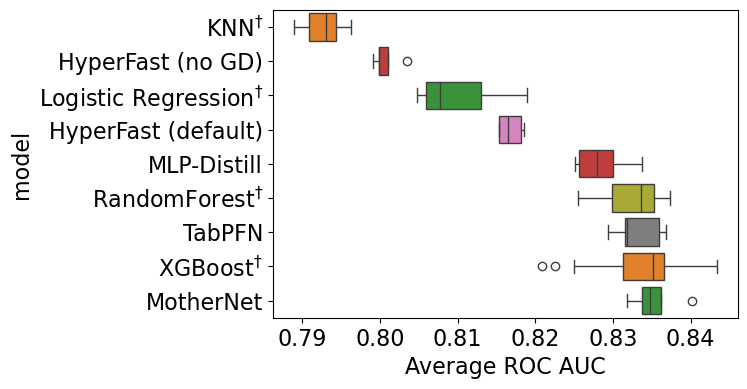

In [35]:
plt.figure(figsize=(6, 4))
compare_splits_valid = compare_splits_valid[~compare_splits_valid.model.isin(["KNN", "Neural Network"])]
order = compare_splits_valid.groupby("model").mean("mean_metric").sort_values("mean_metric").index
sns.boxplot(data=compare_splits_valid, y="model", x="mean_metric", order=order, ax=plt.gca(), palette=color_mapping)
#sns.boxplot(data=compare_splits_valid, y="model", x="mean_metric",order=order, ax=plt.gca(), hue="model")

plt.xlabel("Average ROC AUC")
plt.savefig("../figures/mean_roc_auc_validation.pdf", dpi=300, bbox_inches="tight")

In [ ]:
compare_splits_test.model.unique()

In [ ]:
def hide_for_plots(df):
    hidden_models = ["MotherNet (CPU)", 'MotherNet (no baggging)','MotherNet plus Gradient Descent$^\\ddag$']
    return df[~df.model.isin(hidden_models)]

In [ ]:
hide_for_plots(compare_splits_test_no_cpu).model.unique()

In [ ]:
if test_result_file:
    plt.figure(figsize=(6, 4))
    compare_splits_test_no_cpu = hide_for_plots(compare_splits_test)
    order = compare_splits_test_no_cpu.groupby("model").mean("mean_metric").sort_values("mean_metric").index
    sns.boxplot(data=compare_splits_test_no_cpu, y="model", x="mean_metric", order=order, ax=plt.gca(), palette=color_mapping)
    plt.xlabel("Average ROC AUC")
    plt.savefig("../figures/mean_roc_auc_test.pdf", dpi=300, bbox_inches="tight")

In [ ]:
def normalize_metric(results):
    dataset_min_max = results.groupby("dataset").mean_metric.agg(["min", "max"])
    results_normalized = results.merge(dataset_min_max, on="dataset")
    results_normalized['mean_metric'] = (results_normalized['mean_metric'] - results_normalized['min']) / (results_normalized['max'] - results_normalized['min'])
    return results_normalized

In [ ]:
compare_splits_over_time_valid_normalized, compare_splits_valid_normalized = compare_splits(normalize_metric(valid_results))
if test_result_file:
    compare_splits_over_time_test_normalized, compare_splits_test_normalized = compare_splits(normalize_metric(test_results))

In [ ]:
compare_splits_test_normalized.to_csv("test_auc_normalized_per_split_gams.csv")

In [ ]:
if test_result_file:
    plt.figure(figsize=(6, 4))
    compare_splits_test_normalized_no_cpu = hide_for_plots(compare_splits_test)
    order = compare_splits_test_normalized_no_cpu.groupby("model").mean("mean_metric").sort_values("mean_metric").index
    sns.boxplot(data=compare_splits_test_normalized_no_cpu, y="model", x="mean_metric", order=order, ax=plt.gca(), palette=color_mapping)
    plt.xlabel("Average ROC AUC (normalized)", loc="right")
    plt.savefig("../figures/mean_roc_auc_test_normalized.pdf", dpi=300, bbox_inches="tight")

In [ ]:
# table.drop(index=["mothernet_old", "mlp_distill", 'KNN']).rename({'mn_Dclass_average_03_25_2024_17_14_32_epoch_2910_ohe_ensemble_8': 'MotherNet'})

In [ ]:
plt.figure(figsize=(6, 16))
compare_splits_valid_normalized = compare_splits_valid_normalized[~compare_splits_valid_normalized.model.isin(["KNN", "Neural Network"])]
order = compare_splits_valid_normalized.groupby("model").mean("mean_metric").sort_values("mean_metric").index
sns.boxplot(data=compare_splits_valid_normalized, y="model", x="mean_metric", order=order, ax=plt.gca(), palette=color_mapping)
#sns.boxplot(data=compare_splits_valid_normalized, y="model", x="mean_metric", order=order, ax=plt.gca(), hue='model')

plt.xlabel("Average ROC AUC (normalized)", loc="right")
plt.savefig("../figures/mean_roc_auc_valid_normalized.pdf", dpi=300, bbox_inches="tight")

In [ ]:
compare_splits_test_normalized.model.unique()

In [ ]:
def make_score_table(split_df, metric_name):
    split_df_groupby = split_df.rename(columns={'mean_metric': metric_name}).groupby("model")[['fit_time', 'inference_time', metric_name]]
    split_df_mean = split_df_groupby.mean()
    split_df_std = split_df_groupby.std()
    return split_df_mean.merge(split_df_std, on="model", suffixes=("", " std"))

In [ ]:
compare_splits_test

In [ ]:
normed_table = make_score_table(compare_splits_test_normalized, "Normalized ROC AUC")
unnormed_table = make_score_table(compare_splits_test, "ROC AUC")

In [ ]:
pivoted_for_cd_test

In [ ]:
ranks_test = pivoted_for_cd_test.T.rank(ascending=False).mean(axis=1).rename("rank")
result_table = unnormed_table.merge(normed_table.drop(columns=["inference_time", "fit_time", "inference_time std", "fit_time std"]), left_index=True, right_index=True).merge(ranks_test, left_on="model", right_index=True, how="left").sort_values("rank")


In [ ]:
result_table['fit+predict'] = result_table['fit_time'] + result_table['inference_time']

In [ ]:
pd.set_option("display.float_format", lambda x: f"{x:.3f}")

result_table[['rank', 'Normalized ROC AUC', 'Normalized ROC AUC std', 'ROC AUC', 'ROC AUC std', 'fit_time', 'inference_time', 'fit+predict']]

In [ ]:
plt.figure(figsize=(8, 8))
for_scatter_plot = result_table.dropna(subset="rank").drop(index=["KNN$^\dag$", "HyperFast (no GD)"])
for_scatter_plot.plot(x="Normalized ROC AUC", y="fit+predict", kind="scatter", ax=plt.gca())
for  name, row in for_scatter_plot.iterrows():
    plt.text(row["Normalized ROC AUC"], row["fit+predict"], name)
plt.yscale("log")
plt.xlim(0.67, 0.9)
plt.savefig("../figures/time_roc_scatter.pdf", dpi=300, bbox_inches="tight")

In [ ]:
for_paper = result_table[['rank', 'Normalized ROC AUC', 'Normalized ROC AUC std', 'ROC AUC', 'ROC AUC std', 'fit_time', 'inference_time', "fit+predict"]].copy()
for_paper['Normalized ROC AUC'] = for_paper['Normalized ROC AUC'].apply(fmt) + "$\pm$" + for_paper['Normalized ROC AUC std'].apply(fmt)
for_paper['ROC AUC'] = for_paper['ROC AUC'].apply(fmt) + "$\pm$" + for_paper['ROC AUC std'].apply(fmt)
for_paper = for_paper.drop(columns=['Normalized ROC AUC std', 'ROC AUC std'])
for_paper.columns = ['rank', 'normalized AUC', 'AUC', 'fit time', 'predict time', "fit + predict" ]
print(for_paper.to_latex(float_format="%.3f"))

In [ ]:
# plt.figure(figsize=(4, 3), dpi=300)

# compare_splits_varies = compare_splits_over_time_valid_normalized[compare_splits_over_time_valid_normalized.model.isin(varies_over_time)]
# compare_splits_fixed = compare_splits_over_time_valid_normalized[~compare_splits_over_time_valid_normalized.model.isin(varies_over_time)]


# ax = sns.lineplot(data=compare_splits_varies, x="max_time", y="mean_metric", hue="model",  marker="o", palette=color_mapping)

# compare_splits_fixed_dummy = compare_splits_over_time_valid_normalized.copy()
# compare_splits_fixed_dummy['max_time'] = compare_splits_varies.max_time.max()
# sns.lineplot(data=pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
#               x="max_time", y="mean_metric", hue="model", ax=ax, palette=color_mapping)
# plt.xscale("log")
# #legend = plt.legend(loc=(1.1 , .3))
# legend = ax.get_legend()
# legend.remove()
# #ax.set_ylim(0.85, 0.90)
# ax.set_ylabel("mean ROC AUC")
# ax.set_xlabel("max time (s)")
# plt.savefig("../figures/mean_auc_over_time_valid_normalized.pdf", bbox_inches="tight")

In [ ]:
sns.clustermap((pivoted_for_cd_test.T - pivoted_for_cd_test.T.mean()), figsize=(20, 10))

In [ ]:
print(pivoted_for_cd_test.to_latex(float_format="%.2f"))

In [ ]:
((pivoted_for_cd_test.T - pivoted_for_cd_test.T.min()) / (pivoted_for_cd_test.T.max() - pivoted_for_cd_test.T.min())).T

In [ ]:
bla = compare.drop(columns="diff")
bla = bla[bla.index != 'mofn-3-7-10']

In [ ]:
grr = bla_normed.isna().T.any()

In [ ]:
bla.index

In [ ]:
grr = bla_normed.isna().T.any()
grr[grr]

In [ ]:
bla_normed = ((bla.T - bla.mean(axis=1))/bla.std(axis=1)).T
bla_normed2 = (bla.T - bla.mean(axis=1)).T

In [ ]:
sns.clustermap(bla_normed.T)

In [ ]:
sns.clustermap(bla_normed2.T)